In [50]:
%tensorflow_version

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.


In [44]:
# keras library
import keras

In [32]:
# 개발 환경 만들기
from tensorflow.keras.models import Sequential            # 신공망의 종류 (입력층, 은닉층, 출력층)        
from tensorflow.keras.layers import Dense, Activation     # 레이어 도구 불러오기 (Dense:뉴런 개수, Activation:활성화 함수)
from tensorflow.keras.utils import to_categorical         # to_categorical 유틸 도구중 함수 불러오기
from tensorflow.keras.datasets import mnist               # mnist 데이터셋 불러오기 
import numpy as np                                        # numpy 수학 계산 library
import matplotlib.pyplot as plt                           # matplotlib 그래프 library 사용 (ply= pyplot 그림 그리는 library)

In [53]:
# 데이터셋 불러오기
(x_train, y_train), (x_test, y_test) = mnist.load_data()  # mnist 에서 데이터셋 불러오기
print("x_train shape", x_train.shape)                     # 출력
print("x_train shape", y_train.shape)                     # or 60000개의 데이터 가로 세로 28개씩
print("x_test shape", x_test.shape)                       # 출력
print("y_test shape", y_test.shape)                       # or 10000개의 ~
print()
print("y_train shape", y_train.shape)

x_train shape (60000, 28, 28)
x_train shape (60000,)
x_test shape (10000, 28, 28)
y_test shape (10000,)

y_train shape (60000,)


In [34]:
# mnist 데이터셋에서 X 형태 변경
X_train = x_train.reshape(60000,784)                      # 28x28 형태의 데이터를 1x784로 변경
X_test = x_test.reshape(10000,784)
X_train = X_train.astype('float32')                       # 정규화를 위해 0~1 사이의 실수 값으로 변경
X_test = X_test.astype('float32')
X_train /= 255                                            # mnist(검은색 0, 흰색 255, 회색 1~254)
X_test /= 255                                             # or 각 데이터를 255로 나눈 값
print("X Training matrix shape", X_train.shape)           # 출력
print("X Testing matrix shape", X_test.shape)

X Training matrix shape (60000, 784)
X Testing matrix shape (10000, 784)


In [35]:
# mnist 데이터셋에서 Y 형태 변경
Y_train = to_categorical(y_train, 10)                     
Y_test = to_categorical(y_test, 10)
print("Y Training matrix shape", Y_train.shape)
print("Y Testing matrix shape", Y_test.shape)

Y Training matrix shape (60000, 10)
Y Testing matrix shape (10000, 10)


In [36]:
# 인공지능 모델 설계
model = Sequential()
model.add(Dense(512, input_shape=(784,)))   # 입력784, 은닉층 512
model.add(Activation('relu'))
model.add(Dense(256))                       # 은닉층 256
model.add(Activation('relu'))
model.add(Dense(10))                        # 출력층 10
model.add(Activation('softmax'))    
model.summary()                             

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 512)               401920    
                                                                 
 activation_12 (Activation)  (None, 512)               0         
                                                                 
 dense_13 (Dense)            (None, 256)               131328    
                                                                 
 activation_13 (Activation)  (None, 256)               0         
                                                                 
 dense_14 (Dense)            (None, 10)                2570      
                                                                 
 activation_14 (Activation)  (None, 10)                0         
                                                                 
Total params: 535,818
Trainable params: 535,818
Non-tr

In [37]:
# 모델 학습
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(X_train, Y_train, batch_size=128, epochs=10, verbose=1)

Epoch 1/10
469/469 [==============================] - 4s 3ms/step - loss: 0.2276 - accuracy: 0.9335
Epoch 2/10
469/469 [==============================] - 1s 3ms/step - loss: 0.0835 - accuracy: 0.9743
Epoch 3/10
469/469 [==============================] - 1s 3ms/step - loss: 0.0516 - accuracy: 0.9836
Epoch 4/10
469/469 [==============================] - 1s 3ms/step - loss: 0.0361 - accuracy: 0.9883
Epoch 5/10
469/469 [==============================] - 1s 3ms/step - loss: 0.0261 - accuracy: 0.9919
Epoch 6/10
469/469 [==============================] - 1s 3ms/step - loss: 0.0229 - accuracy: 0.9922
Epoch 7/10
469/469 [==============================] - 1s 3ms/step - loss: 0.0182 - accuracy: 0.9938
Epoch 8/10
469/469 [==============================] - 1s 3ms/step - loss: 0.0154 - accuracy: 0.9949
Epoch 9/10
469/469 [==============================] - 1s 3ms/step - loss: 0.0136 - accuracy: 0.9955
Epoch 10/10
469/469 [==============================] - 1s 3ms/step - loss: 0.0169 - accuracy: 0.9940

In [39]:
# 모델 정확도
score = model.evaluate(X_test, Y_test)
print('Test score', score[0])
print('Test accuracy:', score[1])

313/313 [==============================] - 1s 2ms/step - loss: 0.0821 - accuracy: 0.9801
Test score 0.08211048692464828
Test accuracy: 0.9800999760627747


In [41]:
# 모델 학습 결과
predicted_classes = np.argmax(model.predict(X_test), axis=1)
correct_indices = np.nonzero(predicted_classes == y_test)[0]
incorrect_indices = np.nonzero(predicted_classes != y_test)[0]

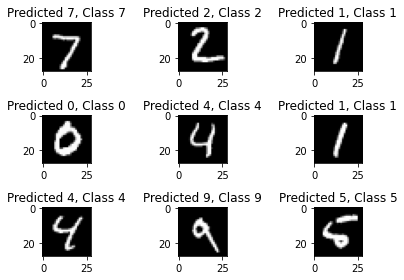

In [43]:
# 시각화 결과 (잘된)
plt.figure()
for i in range(9):
  plt.subplot(3,3,i+1)
  correct = correct_indices[i]
  plt.imshow(X_test[correct].reshape(28,28), cmap='gray')
  plt.title("Predicted {}, Class {}".format(predicted_classes[correct], y_test[correct]))
  plt.tight_layout()

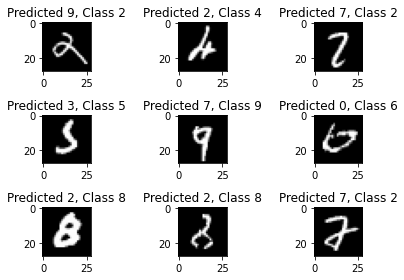

In [49]:
# 시각화 결과 (잘못된)
plt.figure()
for i in range(9):
  plt.subplot(3,3,i+1)
  incorrect = incorrect_indices[i]
  plt.imshow(X_test[incorrect].reshape(28,28), cmap='gray')
  plt.title("Predicted {}, Class {}".format(predicted_classes[incorrect], y_test[incorrect]))
  plt.tight_layout()